# K-Nearest Neighbors

## 1. Introduction
* K-Nearest Neighbors (KNN) is a simple, versatile, and widely used algorithm in machine learning for classification and regression tasks. 
* KNN is a non-parametric, lazy learning algorithm. Non-parametric means it makes no explicit assumptions about the functional form of the data, and lazy implies it doesn't need a training phase. 
* It operates by finding the 'k' closest data points (neighbors) in the training set to a given input point and making predictions based on these neighbors. 

## 2. Algorithm
### 2.1 Idea
1. **Defining 'K'**: Choose a number 'K' which represents the number of nearest neighbors to consider.
2. **Distance Measure**: Calculate the distance (often Euclidean) between the query instance and all the training samples.
$$d(v,w)=\sqrt {(v_1-w_1)^2+(v_2-w_2)^2+...+(v_n-w_n)^2}=\sqrt {(v-w)^T(v-w)}$$
3. **Find Nearest Neighbors**: Identify 'K' closest samples (neighbors) in the training dataset.
4. **Aggregate Neighbors' Outputs**: *Classification*: Assign the class to the query point based on the majority vote among its 'K' nearest neighbors. *Regression*: Predict the output for the query point as the average of the values of its 'K' nearest neighbors.
### 2.2 Considerations
1. **Choice of 'K'**: A small 'K' can lead to a noisy model susceptible to outliers. A large 'K' smoothens the decision boundaries but might blur the distinctions between different classes.
2. **Distance Metric**: Euclidean distance is common, but others like Manhattan or Minkowski can be more suitable depending on the data.
3. **Scaling**: Feature scaling is crucial since KNN relies on distance measurements.
4. **Curse of Dimensionality**: KNN's performance degrades with high-dimensional data due to the increase in distance measure's sparsity.
5. **Data Quality**: KNN is sensitive to noisy or irrelevant features.

## 3. Implementation

### 3.1 Dataset
In this section, we utilized a publicly accessible dataset from Kaggle, originating from a continuous cardiovascular research project conducted in Framingham, Massachusetts. This dataset's primary objective is to forecast the 10-year risk of coronary heart disease (CHD) in patients. It contains detailed information on patients, encompassing more than 4,000 entries and 15 different attributes.

In [1]:
from collections import Counter
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("framingham.csv")
data=data.dropna()
X = data.iloc[1:15]
X_scaler = StandardScaler()
X = pd.DataFrame(X_scaler.fit_transform(X))
y = data["TenYearCHD"]
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### 3.2 Algorithm and Implementation
Now we build our K-Nearest Neighbors algorithm based on the idea in section 2.

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN(object):
    """
    K-Nearest Neighbors classifier.

    Attributes:
    k (int): The number of nearest neighbors to consider for classification.

    Methods:
    fit(X, y): Fits the model using X as training data and y as target values.
    predict(X): Predicts the class labels for the provided data.
    _predict(x): Predicts the class label for a single sample.
    """

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [31]:
# Load dataset
y = y.values
X = X.values
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create and train KNN classifier
clf = KNN(k=5)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the classifier
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8237704918032787


We initially chose an arbitrary value of K=5, resulting in an accuracy rate of 82.4%. As mentioned in Section 2, the choice of the parameter 'K' is critical, as it can significantly impact the model's performance. The balance between underfitting and overfitting is a key consideration, where a smaller 'K' can be sensitive to noise, and a larger 'K' potentially smoothens the decision boundary excessively. Now, we will experiment with different values of K to observe their influence on prediction accuracy.

In [40]:
accuracy_difk=[]
for k in range(3, 26, 2):
    dif_k=KNN(k=k)
    dif_k.fit(X_train, y_train) 
    predict_difk=dif_k.predict(X_test)
    acccuracy_temp=np.mean(predict_difk == y_test)
    accuracy_difk.append(acccuracy_temp)

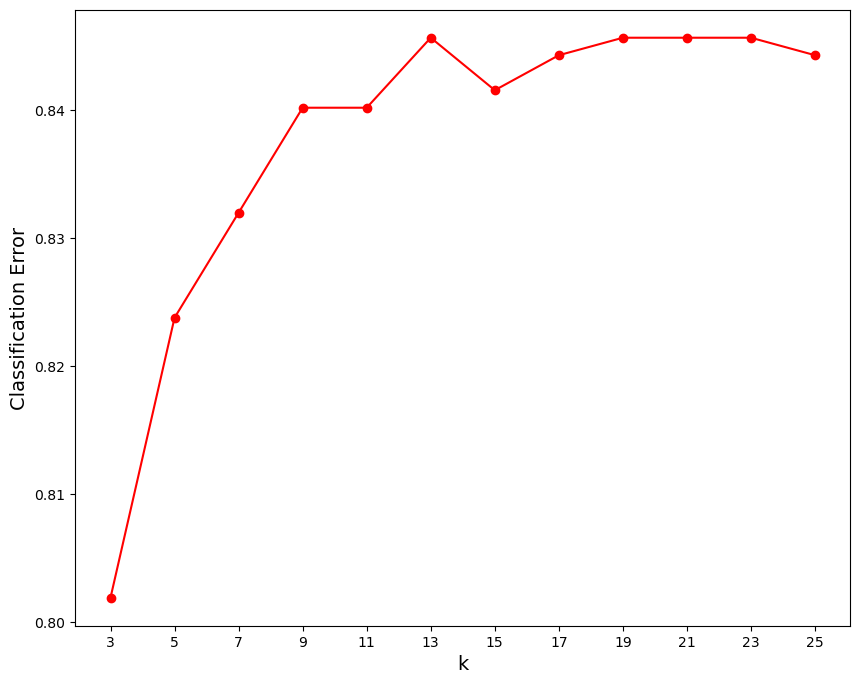

In [42]:
plt.figure(figsize = (10, 8))
plt.plot(range(3, 26, 2), accuracy_difk, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Accuracy', fontsize = 14)
plt.xticks(range(3, 26, 2))
plt.show()

The plot above shows that the classification accuracy initially increases as K increases. However, when K exceeds 13, the accuracy starts to decrease.

## Advantages and Disadvantages
**Advantages:**

* Simple and easy to understand.
* No assumption about data distribution.
* Model updates are easy with new data.

**Disadvantages:**

* Slow on large datasets.
* Poor performance with high dimensional data.
* Sensitive to irrelevant features and imbalanced data.

## Conclusion
K-Nearest Neighbors stands out as a simple yet effective algorithm in the realm of machine learning, especially for classification and regression tasks. Its ease of understanding and implementation makes it a popular choice for many introductory applications. However, the choice of the parameter 'K' is critical, as it can significantly impact the model's performance. 

In summary, KNN serves as a robust starting point in machine learning. Its strengths lie in its simplicity and effectiveness for small to medium-sized datasets. However, careful consideration must be given to aspects such as the choice of 'K', dimensionality, data scaling, and the computational cost, especially when dealing with larger datasets or those with many features. As data science continues to evolve, KNN remains a foundational tool, providing both learning opportunities and practical solutions in various domains.